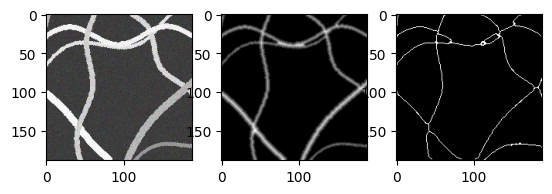

In [1]:
import os
from tools.fiberrandom import FiberSample
import matplotlib.pyplot as plt
#cur_dir = os.path.dirname(os.path.realpath(__file__))
#img_path = os.path.join(cur_dir, '../datasets/simulated/images')
#gt_path = os.path.join(cur_dir, '../datasets/simulated/masks')
    
#initDirectory(img_path)
#initDirectory(gt_path)
sample = FiberSample(189,189,printout=False)
#fiber_ranges = groups(total,15)

sample.setFibers((1,15))
sample.setDiameters((3,9))
#sample.createSampleAndSkeleton()
sample.createSampleAndDistanceMap()
sample.generateSkeleton()


plt.subplot(1,3,1), plt.imshow(sample.dm_img)
plt.subplot(1,3,2), plt.imshow(sample.dm_mask, cmap='gray')
plt.subplot(1,3,3), plt.imshow(sample.skel_mask, cmap='gray')
plt.show()
#sample.saveSampleAndSkeleton(img_path, gt_path, i)


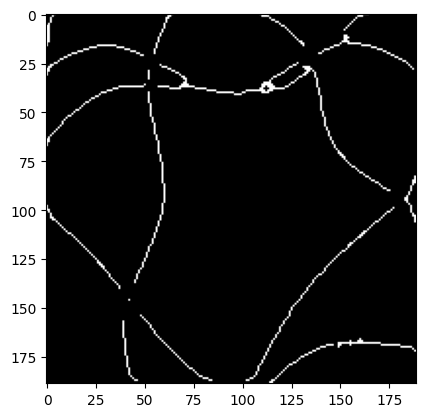

In [2]:
from utils import *

uncrossed = get_and_remove_intersections(sample.dm_mask, sample.skel_mask)

plt.imshow(uncrossed, cmap='gray')
plt.show()

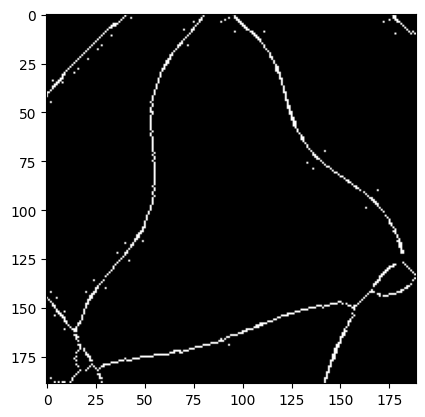

In [3]:
import cv2
import numpy as np
 
img = cv2.cvtColor(sample.dm_img, cv2.COLOR_RGB2GRAY)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
plt.imshow(skel, cmap='gray')
plt.show()

In [3]:
from skimage.filters import threshold_otsu

def get_binary(img):
    thresh = threshold_otsu(img)
    binary = img > thresh
    return binary

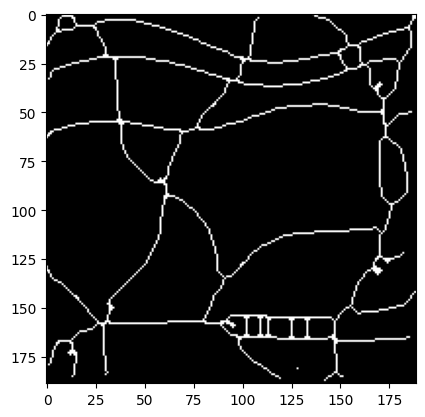

In [4]:
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, binary_closing

image = rgb2gray(sample.dm_img)

# Convert gray image to binary
image = get_binary(image)

# Skeletonize (otsu + skeletonize_3d)
skeleton = skeletonize(image)
skeleton = binary_closing(skeleton)

plt.imshow(skeleton, cmap='gray')
plt.show()